In [8]:
! pip install pydub librosa matplotlib

In [9]:
from pydub import AudioSegment
from pydub.silence import detect_silence

path = "/home/ste/Code/birds/dataset/Dryocopus_martius/1802.mp3"
path = "/home/ste/Code/birds/dataset/Aegolius_funereus/BOOW.3.20.09.Grand.Mesa.mp3"
path = "/home/ste/Code/birds/dataset/Phoenicurus_ochruros/BlackRedstart17Feb2009TafraouteMorocco.mp3"
# Load the audio file
audio = AudioSegment.from_mp3(path)


In [10]:
# Define silence threshold and minimum duration
silence_threshold = -32  # in dBFS
min_silence_len = 300   # in milliseconds

# Detect silence (returns start and end times in milliseconds)
silent_ranges = detect_silence(audio, min_silence_len, silence_threshold)

# Convert silent_ranges to seconds for easier handling
silent_ranges_seconds = [(start / 1000, end / 1000) for start, end in silent_ranges]
silent_ranges_seconds


[(0.0, 6.06)]

In [11]:
# Add silence markers as metadata
for start, end in silent_ranges_seconds:
    print(f"Silent segment: {start:.2f}s to {end:.2f}s")


Silent segment: 0.00s to 6.06s


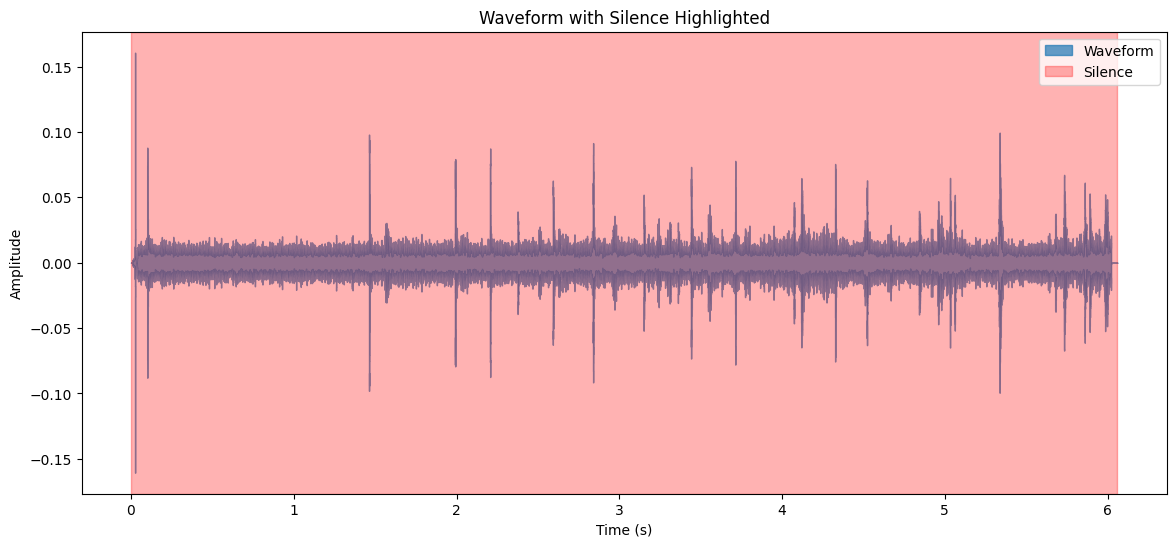

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio as a NumPy array
signal, sr = librosa.load(path, sr=None)

# Plot the waveform
plt.figure(figsize=(14, 6))
librosa.display.waveshow(signal, sr=sr, alpha=0.7, label="Waveform")

# Highlight silent parts
for start, end in silent_ranges_seconds:
    plt.axvspan(start, end, color="red", alpha=0.3, label="Silence" if start == silent_ranges_seconds[0][0] else "")

plt.title("Waveform with Silence Highlighted")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [30]:
import librosa
import numpy as np

# Load the audio
signal, sr = librosa.load(path, sr=None)
print(signal)
# Calculate root-mean-square energy (RMS)
frame_length = 2048
hop_length = 512
rms = librosa.feature.rms(y=signal, frame_length=frame_length, hop_length=hop_length)[0]
# print(rms)
# Set a threshold for energy (adjust as needed)
energy_threshold = 0.013
frames = np.where(rms > energy_threshold)[0]
print(frames)
# Convert frames to time
times = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

# Extract non-silent parts
# start_time = times[0]
# end_time = times[-1]
# trimmed_signal = signal[int(start_time * sr):int(end_time * sr)]

print(times)
# # Save the trimmed audio
# import soundfile as sf
# sf.write("birdcalls_trimmed.wav", trimmed_signal, sr)


[ 0.0000000e+00 -1.5568546e-11  2.9222202e-10 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[305 306 307 308 353 354 355 356 357 426 427 428 429 458 459 460 461 493
 494 495 496 504 505 506 514 515 516 517 518]
[3.54104308 3.55265306 3.56426304 3.57587302 4.098322   4.10993197
 4.12154195 4.13315193 4.1447619  4.94585034 4.95746032 4.96907029
 4.98068027 5.31736961 5.32897959 5.34058957 5.35219955 5.72371882
 5.7353288  5.74693878 5.75854875 5.85142857 5.86303855 5.87464853
 5.96752834 5.97913832 5.9907483  6.00235828 6.01396825]
